In [114]:
#Alpha Advantage

import requests
import re
import pandas as pd
import json
import time
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#mport OS - Gonçalo Usa MAC 

In [115]:
key = 'NWGOGUGXN2IFYE6ONWGOGUGXN2IFYE6O'

In [116]:
'''ts = TimeSeries(key=api-Key, output_format='pandas')
data, meta_data = ts.get_weekly(symbol='DXY', interval = '', outputsize = 'full')'''

inputs = { 
    'function': 'TIME_SERIES_WEEKLY_ADJUSTED',
    'symbol' : 'DXY',
    'datatype': 'json',
    'apykey' : key
}

In [117]:
url = "https://www.alphavantage.co/query?function=TIME_SERIES_WEEKLY_ADJUSTED&symbol=DXY&apikey=NWGOGUGXN2IFYE6ONWGOGUGXN2IFYE6ONWGOGUGXN2IFYE6ONWGOGUGXN2IFYE6O"

In [118]:
response = requests.get(url, inputs)

In [119]:
response.content

b'{\n    "Meta Data": {\n        "1. Information": "Weekly Adjusted Prices and Volumes",\n        "2. Symbol": "DXY",\n        "3. Last Refreshed": "2020-04-29",\n        "4. Time Zone": "US/Eastern"\n    },\n    "Weekly Adjusted Time Series": {\n        "2020-04-29": {\n            "1. open": "746.3900",\n            "2. high": "755.3100",\n            "3. low": "746.3900",\n            "4. close": "755.3100",\n            "5. adjusted close": "755.3100",\n            "6. volume": "0",\n            "7. dividend amount": "0.0000"\n        },\n        "2020-04-24": {\n            "1. open": "729.8600",\n            "2. high": "737.5900",\n            "3. low": "725.6200",\n            "4. close": "725.6200",\n            "5. adjusted close": "725.6200",\n            "6. volume": "0",\n            "7. dividend amount": "0.0000"\n        },\n        "2020-04-16": {\n            "1. open": "735.3200",\n            "2. high": "754.6000",\n            "3. low": "728.7900",\n            "4. c

In [120]:
pd.DataFrame(response.json())

,Meta Data,Weekly Adjusted Time Series
1. Information,Weekly Adjusted Prices and Volumes,NaN
2. Symbol,DXY,NaN
3. Last Refreshed,2020-04-29,NaN
4. Time Zone,US/Eastern,NaN
2020-04-29,NaN,"{'1. open': '746.3900', '2. high': '755.3100',..."
...,...,...
2006-02-10,NaN,"{'1. open': '6478.8101', '2. high': '6790.9902..."
2006-02-03,NaN,"{'1. open': '5776.1899', '2. high': '6130.8599..."
2006-01-27,NaN,"{'1. open': '5780.6299', '2. high': '5863.2998..."
2006-01-20,NaN,"{'1. open': '5640.6201', '2. high': '5778.8701..."


In [121]:
data = pd.DataFrame(response.json()['Weekly Adjusted Time Series'])
data.head()

,2020-04-29,2020-04-24,2020-04-16,2020-04-09,2020-04-03,2020-03-27,2020-03-12,2020-03-06,2020-02-24,2020-02-21,...,2006-03-17,2006-03-10,2006-03-03,2006-02-24,2006-02-17,2006-02-10,2006-02-03,2006-01-27,2006-01-20,2006-01-13
1. open,746.3900,729.8600,735.3200,725.9500,753.3000,706.1900,653.7800,797.5300,962.2900,1062.5500,...,6633.3901,6402.0200,6686.2700,6602.7202,6560.0498,6478.8101,5776.1899,5780.6299,5640.6201,5268.6201
2. high,755.3100,737.5900,754.6000,748.3300,753.3000,715.5100,733.6100,859.4100,962.2900,1066.2900,...,6951.5298,6402.0200,6686.2700,6802.1802,6710.1001,6790.9902,6130.8599,5863.2998,5778.8701,5526.3301
3. low,746.3900,725.6200,728.7900,725.9500,663.4100,706.1900,630.4000,786.7100,962.2900,1046.3000,...,6633.3901,6150.3901,6383.2798,6602.7202,6462.1499,6478.8101,5776.1899,5758.7202,5605.3101,5268.6201
4. close,755.3100,725.6200,746.2600,735.3200,663.4100,715.5100,630.4000,786.7100,962.2900,1046.3000,...,6951.5298,6395.1699,6402.0200,6802.1802,6710.1001,6726.9800,6130.8599,5758.7202,5778.8701,5521.1699
5. adjusted close,755.3100,725.6200,746.2600,735.3200,663.4100,715.5100,630.4000,786.7100,962.2900,1046.3000,...,6951.5298,6395.1699,6402.0200,6802.1802,6710.1001,6726.9800,6130.8599,5758.7202,5778.8701,5521.1699


In [122]:
data = pd.DataFrame(response.json()['Weekly Adjusted Time Series']).T
data['Symbol'] = 'DXY'
data

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,Symbol
2020-04-29,746.3900,755.3100,746.3900,755.3100,755.3100,0,0.0000,DXY
2020-04-24,729.8600,737.5900,725.6200,725.6200,725.6200,0,0.0000,DXY
2020-04-16,735.3200,754.6000,728.7900,746.2600,746.2600,0,0.0000,DXY
2020-04-09,725.9500,748.3300,725.9500,735.3200,735.3200,0,0.0000,DXY
2020-04-03,753.3000,753.3000,663.4100,663.4100,663.4100,0,0.0000,DXY
...,...,...,...,...,...,...,...,...
2006-02-10,6478.8101,6790.9902,6478.8101,6726.9800,6726.9800,0,0.0000,DXY
2006-02-03,5776.1899,6130.8599,5776.1899,6130.8599,6130.8599,0,0.0000,DXY
2006-01-27,5780.6299,5863.2998,5758.7202,5758.7202,5758.7202,0,0.0000,DXY
2006-01-20,5640.6201,5778.8701,5605.3101,5778.8701,5778.8701,0,0.0000,DXY


In [123]:
data = data.drop(['5. adjusted close','6. volume','7. dividend amount'], axis=1)

In [124]:
# After drop it's time to became numeric for calculate returns 
# Returns
data['4. close'] = pd.to_numeric(data['4. close'])
data['returns'] = (data['4. close']-data['4. close'].shift(-1))/data['4. close'].shift(-1)


In [125]:
data['volatility'] = data['returns'].rolling(5).std()*np.sqrt(250)
data = data.iloc[::-1]

# calculate the median pf volatity
data['median'] = data['volatility'].agg(np.median)
data.head(20)

,1. open,2. high,3. low,4. close,Symbol,returns,volatility,median
2006-01-13,5268.6201,5526.3301,5268.6201,5521.1699,DXY,NaN,NaN,0.778217
2006-01-20,5640.6201,5778.8701,5605.3101,5778.8701,DXY,0.046675,0.690255,0.778217
2006-01-27,5780.6299,5863.2998,5758.7202,5758.7202,DXY,-0.003487,0.710871,0.778217
2006-02-03,5776.1899,6130.8599,5776.1899,6130.8599,DXY,0.064622,0.957713,0.778217
2006-02-10,6478.8101,6790.9902,6478.8101,6726.9800,DXY,0.097233,0.888796,0.778217
2006-02-17,6560.0498,6710.1001,6462.1499,6710.1001,DXY,-0.002509,0.826567,0.778217
2006-02-24,6602.7202,6802.1802,6602.7202,6802.1802,DXY,0.013723,0.828634,0.778217
2006-03-03,6686.2700,6686.2700,6383.2798,6402.0200,DXY,-0.058828,0.913421,0.778217
2006-03-10,6402.0200,6402.0200,6150.3901,6395.1699,DXY,-0.001070,0.851628,0.778217
2006-03-17,6633.3901,6951.5298,6633.3901,6951.5298,DXY,0.086997,0.869101,0.778217


In [126]:
metadata = pd.DataFrame.from_dict(response.json()['Meta Data'], orient='index').T
metadata.T

,0
1. Information,Weekly Adjusted Prices and Volumes
2. Symbol,DXY
3. Last Refreshed,2020-04-29
4. Time Zone,US/Eastern


In [127]:
data = data.iloc[104:,]


In [128]:
data_great_recession = data.iloc[:107]

In [129]:
data_great_recession

,1. open,2. high,3. low,4. close,Symbol,returns,volatility,median
2008-01-04,10545.0000,10545.0000,10210.5996,10278.7998,DXY,-0.012746,0.449372,0.778217
2008-01-11,10092.2998,10148.5996,9563.3799,9616.7500,DXY,-0.064409,0.425034,0.778217
2008-01-18,9642.5703,9642.5703,9203.7695,9216.4600,DXY,-0.041624,0.387608,0.778217
2008-01-25,8471.6602,8872.1299,7943.1201,8872.1299,DXY,-0.037360,0.402222,0.778217
2008-02-01,8596.7998,8956.6396,8596.7998,8956.6396,DXY,0.009525,0.440842,0.778217
...,...,...,...,...,...,...,...,...
2009-12-11,4273.7100,4273.7100,3910.0901,3910.0901,DXY,-0.129012,1.106842,0.778217
2009-12-18,3954.0100,3973.6201,3809.8201,3809.8201,DXY,-0.025644,0.899364,0.778217
2009-12-24,3743.3601,3913.5500,3743.3601,3913.5500,DXY,0.027227,0.926186,0.778217
2009-12-31,3830.0801,3911.8401,3830.0801,3854.1399,DXY,-0.015181,1.350251,0.778217


In [130]:
data = data.iloc[475:,]

In [131]:
data_brexit = data.iloc[0:122]

In [132]:
data_brexit

,1. open,2. high,3. low,4. close,Symbol,returns,volatility,median
2017-03-03,1045.5900,1045.9500,1023.0400,1028.6100,DXY,-0.016240,0.344072,0.778217
2017-03-10,1018.8700,1050.1100,1018.8700,1043.5100,DXY,0.014486,0.509804,0.778217
2017-03-17,1034.5000,1039.3199,1013.3100,1039.3199,DXY,-0.004015,0.510018,0.778217
2017-03-24,1039.3199,1039.3199,1003.9200,1003.9200,DXY,-0.034061,0.676495,0.778217
2017-03-31,1009.8300,1042.4500,1009.8300,1022.3400,DXY,0.018348,0.737809,0.778217
...,...,...,...,...,...,...,...,...
2019-05-31,943.5700,1029.8000,943.5700,1029.8000,DXY,0.191912,1.670790,0.778217
2019-06-07,1067.8900,1067.8900,1000.5000,1000.5000,DXY,-0.028452,0.984312,0.778217
2019-06-27,1085.4000,1085.4000,1085.4000,1085.4000,DXY,0.084858,0.940236,0.778217
2019-11-29,998.4000,998.4000,998.4000,998.4000,DXY,-0.080155,0.819019,0.778217


In [133]:
data_corona = data.iloc[122:,]


In [134]:
data_corona

,1. open,2. high,3. low,4. close,Symbol,returns,volatility,median
2020-01-10,1015.2700,1048.1200,1015.2700,1045.9700,DXY,0.029295,0.843228,0.778217
2020-01-17,1063.6100,1070.9399,1055.5200,1063.9800,DXY,0.017218,0.828142,0.778217
2020-01-24,1093.8199,1123.8101,1089.6500,1123.8101,DXY,0.056232,0.817807,0.778217
2020-01-31,1099.0100,1099.0100,1028.8600,1028.8600,DXY,-0.084489,0.776378,0.778217
2020-02-07,1034.3000,1062.8700,1031.0800,1031.0800,DXY,0.002158,1.324937,0.778217
2020-02-14,1021.1000,1068.2200,1021.1000,1051.5900,DXY,0.019892,1.576190,0.778217
2020-02-21,1062.5500,1066.2900,1046.3000,1046.3000,DXY,-0.005030,2.172199,0.778217
2020-02-24,962.2900,962.2900,962.2900,962.2900,DXY,-0.080292,2.104545,0.778217
2020-03-06,797.5300,859.4100,786.7100,786.7100,DXY,-0.182461,2.489738,0.778217
2020-03-12,653.7800,733.6100,630.4000,630.4000,DXY,-0.198688,2.164232,0.778217


In [135]:
data_great_recession['Date'] = data_great_recession.index
data_great_recession['Upper boundarie'] = data_great_recession['4. close']*(1+data_great_recession['volatility'])
data_great_recession['Lower boundarie'] = data_great_recession['4. close']*(1-data_great_recession['volatility'])

In [137]:
data_brexit['Date'] = data_brexit.index
data_brexit['Upper boundarie'] = data_brexit['4. close']*(1+data_brexit['volatility'])
data_brexit['Lower boundarie'] = data_brexit['4. close']*(1-data_brexit['volatility'])

C:\Users\gonca\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\gonca\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\gonca\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [138]:
data_brexit

,1. open,2. high,3. low,4. close,Symbol,returns,volatility,median,Date,Upper boundarie,Lower boundarie
2017-03-03,1045.5900,1045.9500,1023.0400,1028.6100,DXY,-0.016240,0.344072,0.778217,2017-03-03,1382.525497,674.694503
2017-03-10,1018.8700,1050.1100,1018.8700,1043.5100,DXY,0.014486,0.509804,0.778217,2017-03-10,1575.495246,511.524754
2017-03-17,1034.5000,1039.3199,1013.3100,1039.3199,DXY,-0.004015,0.510018,0.778217,2017-03-17,1569.392127,509.247673
2017-03-24,1039.3199,1039.3199,1003.9200,1003.9200,DXY,-0.034061,0.676495,0.778217,2017-03-24,1683.067043,324.772957
2017-03-31,1009.8300,1042.4500,1009.8300,1022.3400,DXY,0.018348,0.737809,0.778217,2017-03-31,1776.632036,268.047964
...,...,...,...,...,...,...,...,...,...,...,...
2019-05-31,943.5700,1029.8000,943.5700,1029.8000,DXY,0.191912,1.670790,0.778217,2019-05-31,2750.379589,-690.779589
2019-06-07,1067.8900,1067.8900,1000.5000,1000.5000,DXY,-0.028452,0.984312,0.778217,2019-06-07,1985.304198,15.695802
2019-06-27,1085.4000,1085.4000,1085.4000,1085.4000,DXY,0.084858,0.940236,0.778217,2019-06-27,2105.932228,64.867772
2019-11-29,998.4000,998.4000,998.4000,998.4000,DXY,-0.080155,0.819019,0.778217,2019-11-29,1816.108226,180.691774


In [139]:
data_corona['Date'] = data_corona.index
data_corona['Upper boundarie'] = data_corona['4. close']*(1+data_corona['volatility'])
data_corona['Lower boundarie'] = data_corona['4. close']*(1-data_corona['volatility'])

C:\Users\gonca\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\gonca\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\gonca\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [140]:
data_corona

,1. open,2. high,3. low,4. close,Symbol,returns,volatility,median,Date,Upper boundarie,Lower boundarie
2020-01-10,1015.2700,1048.1200,1015.2700,1045.9700,DXY,0.029295,0.843228,0.778217,2020-01-10,1927.961660,163.978340
2020-01-17,1063.6100,1070.9399,1055.5200,1063.9800,DXY,0.017218,0.828142,0.778217,2020-01-17,1945.106698,182.853302
2020-01-24,1093.8199,1123.8101,1089.6500,1123.8101,DXY,0.056232,0.817807,0.778217,2020-01-24,2042.869757,204.750443
2020-01-31,1099.0100,1099.0100,1028.8600,1028.8600,DXY,-0.084489,0.776378,0.778217,2020-01-31,1827.644716,230.075284
2020-02-07,1034.3000,1062.8700,1031.0800,1031.0800,DXY,0.002158,1.324937,0.778217,2020-02-07,2397.196463,-335.036463
2020-02-14,1021.1000,1068.2200,1021.1000,1051.5900,DXY,0.019892,1.576190,0.778217,2020-02-14,2709.095744,-605.915744
2020-02-21,1062.5500,1066.2900,1046.3000,1046.3000,DXY,-0.005030,2.172199,0.778217,2020-02-21,3319.071949,-1226.471949
2020-02-24,962.2900,962.2900,962.2900,962.2900,DXY,-0.080292,2.104545,0.778217,2020-02-24,2987.472532,-1062.892532
2020-03-06,797.5300,859.4100,786.7100,786.7100,DXY,-0.182461,2.489738,0.778217,2020-03-06,2745.412150,-1171.992150
2020-03-12,653.7800,733.6100,630.4000,630.4000,DXY,-0.198688,2.164232,0.778217,2020-03-12,1994.731696,-733.931696


In [141]:
data_great_recession['1. open'] = pd.to_numeric(data_great_recession['1. open'])
data_great_recession['2. high'] = pd.to_numeric(data_great_recession['2. high'])
data_great_recession['3. low'] = pd.to_numeric(data_great_recession['3. low'])


In [142]:
data_brexit['1. open'] = pd.to_numeric(data_brexit['1. open'])
data_brexit['2. high'] = pd.to_numeric(data_brexit['2. high'])
data_brexit['3. low'] = pd.to_numeric(data_brexit['3. low'])

C:\Users\gonca\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\gonca\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\gonca\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [143]:
data_corona['1. open'] = pd.to_numeric(data_corona['1. open'])
data_corona['2. high'] = pd.to_numeric(data_corona['2. high'])
data_corona['3. low'] = pd.to_numeric(data_corona['3. low'])

C:\Users\gonca\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\gonca\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\gonca\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [144]:
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import LinearLocator

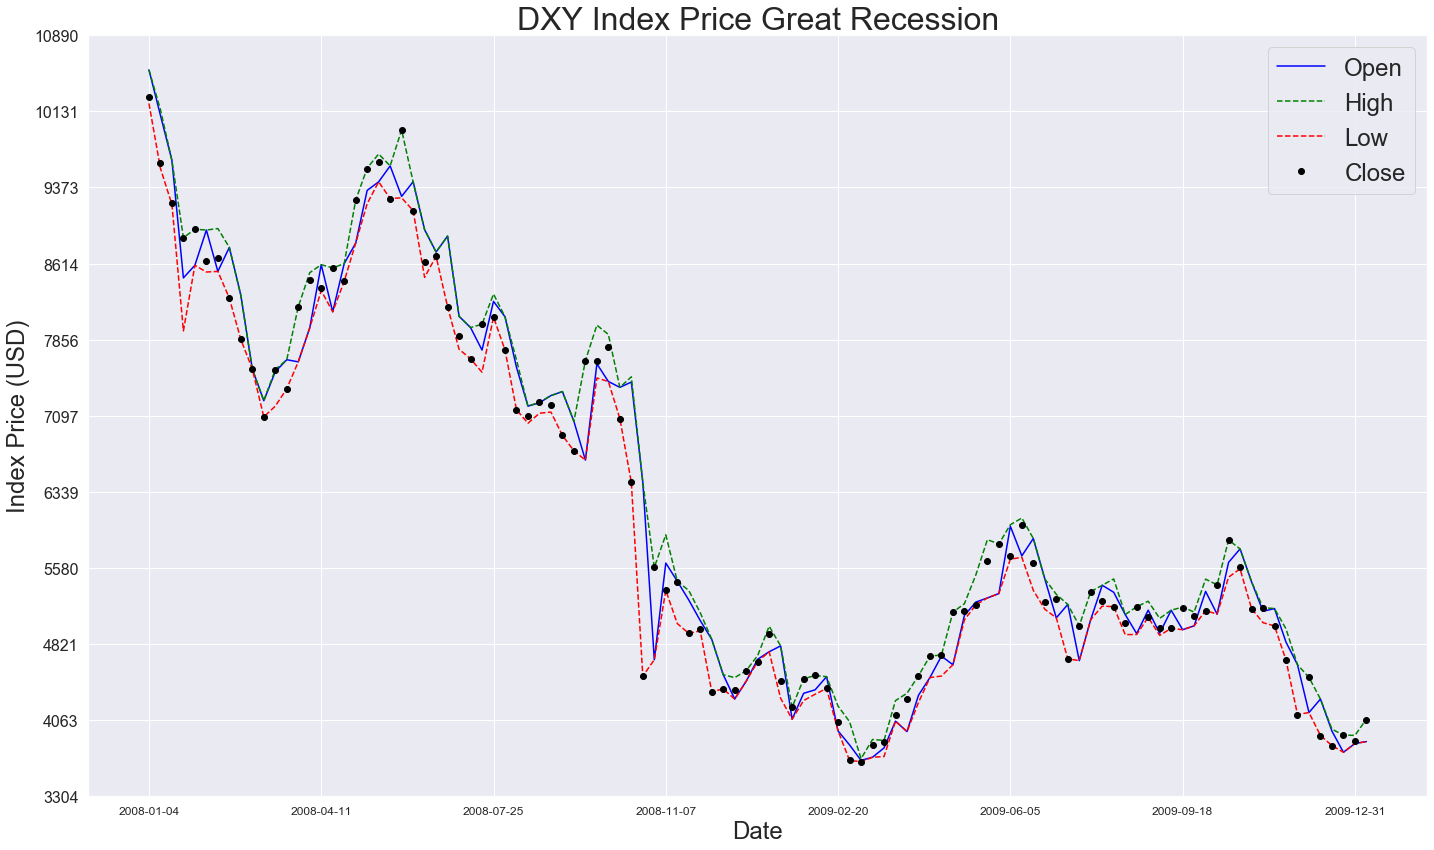

In [153]:
figure = plt.figure(1,figsize=(24,14))
data_great_recession_plot = figure.add_subplot(111)
data_great_recession_plot.set_xlabel('Date',fontsize=24)
data_great_recession_plot.set_ylabel('Index Price (USD)',fontsize=24)
data_great_recession_plot.set_title('DXY Index Price Great Recession',fontsize=32)
data_great_recession_plot.tick_params(axis='y', which='major', labelsize=16)
data_great_recession_plot.tick_params(axis='x', which='major', labelsize=12)
data_great_recession_plot_open = data_great_recession_plot.plot(data_great_recession['Date'],data_great_recession['1. open'],color='blue', label='Open')
data_great_recession_plot_high = data_great_recession_plot.plot(data_great_recession['Date'],data_great_recession['2. high'],'--',color='green', label='High')
data_great_recession_plot_low = data_great_recession_plot.plot(data_great_recession['Date'],data_great_recession['3. low'],'--',color='red', label='Low')
data_great_recession_plot_low = data_great_recession_plot.plot(data_great_recession['Date'],data_great_recession['4. close'],'o', color='black', label='Close')
data_great_recession_plot.legend(loc=1, fontsize=24)
data_great_recession_plot.xaxis.set_major_locator(MaxNLocator(integer=True))
data_great_recession_plot.yaxis.set_major_locator(LinearLocator(11))
plt.show()
figure.savefig('DXY_Index_Price_Great_Recession.jpg')

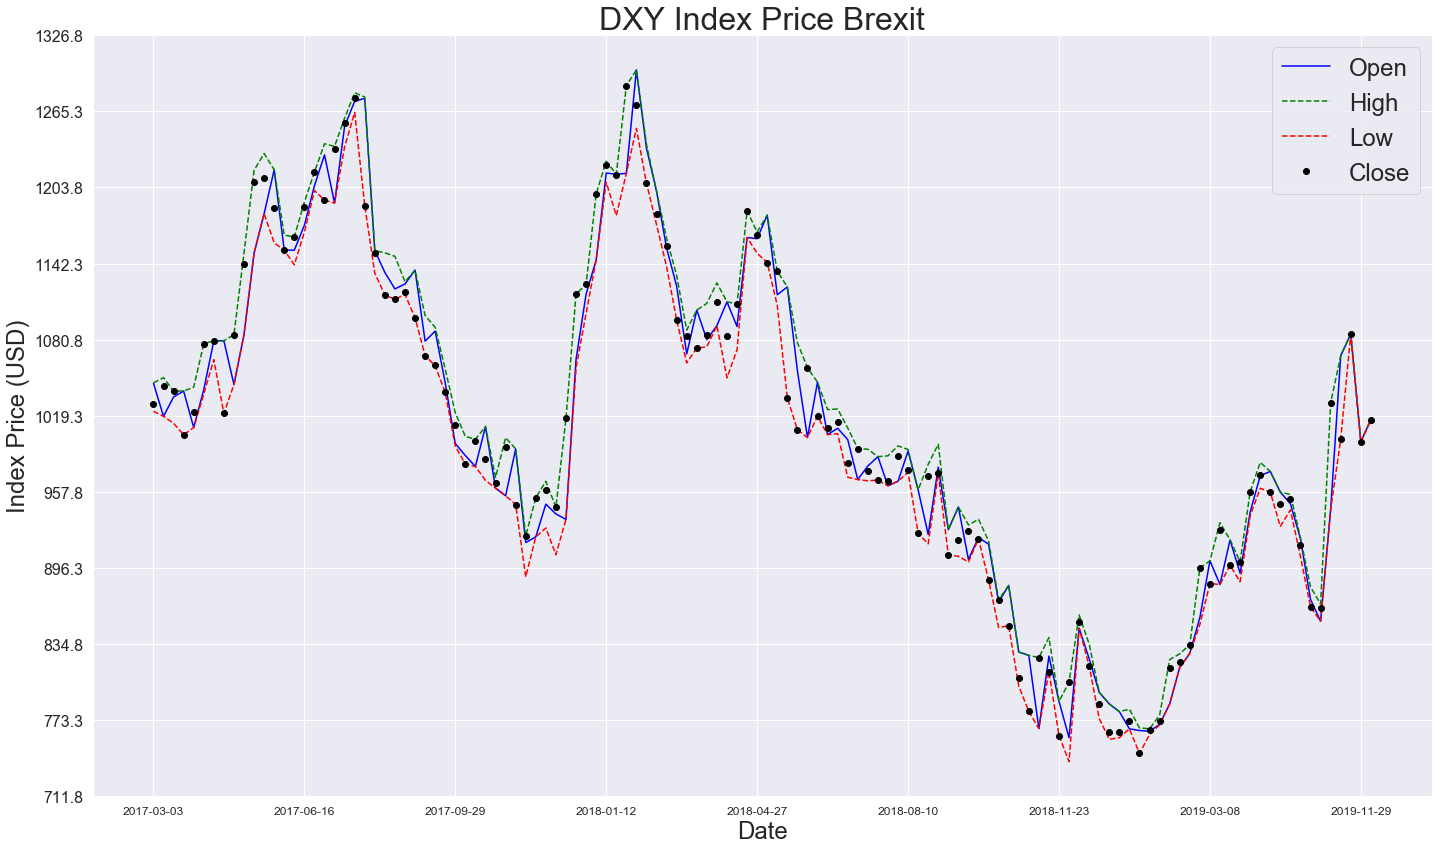

In [156]:
figure = plt.figure(1,figsize=(24,14))
data_brexit_plot = figure.add_subplot(111)
data_brexit_plot.set_xlabel('Date',fontsize=24)
data_brexit_plot.set_ylabel('Index Price (USD)',fontsize=24)
data_brexit_plot.set_title('DXY Index Price Brexit',fontsize=32)
data_brexit_plot.tick_params(axis='y', which='major', labelsize=16)
data_brexit_plot.tick_params(axis='x', which='major', labelsize=12)
data_brexit_plot_open = data_brexit_plot.plot(data_brexit['Date'],data_brexit['1. open'],color='blue', label='Open')
data_brexit_plot_high = data_brexit_plot.plot(data_brexit['Date'],data_brexit['2. high'],'--',color='green', label='High')
data_brexit_plot_low = data_brexit_plot.plot(data_brexit['Date'],data_brexit['3. low'],'--',color='red', label='Low')
data_brexit_plot_close = data_brexit_plot.plot(data_brexit['Date'],data_brexit['4. close'],'o', color='black', label='Close')
data_brexit_plot.legend(loc=1, fontsize=24)
data_brexit_plot.xaxis.set_major_locator(MaxNLocator(integer=True))
data_brexit_plot.yaxis.set_major_locator(LinearLocator(11))
plt.show()
figure.savefig('DXY_Index_Price_Brexit.jpg')

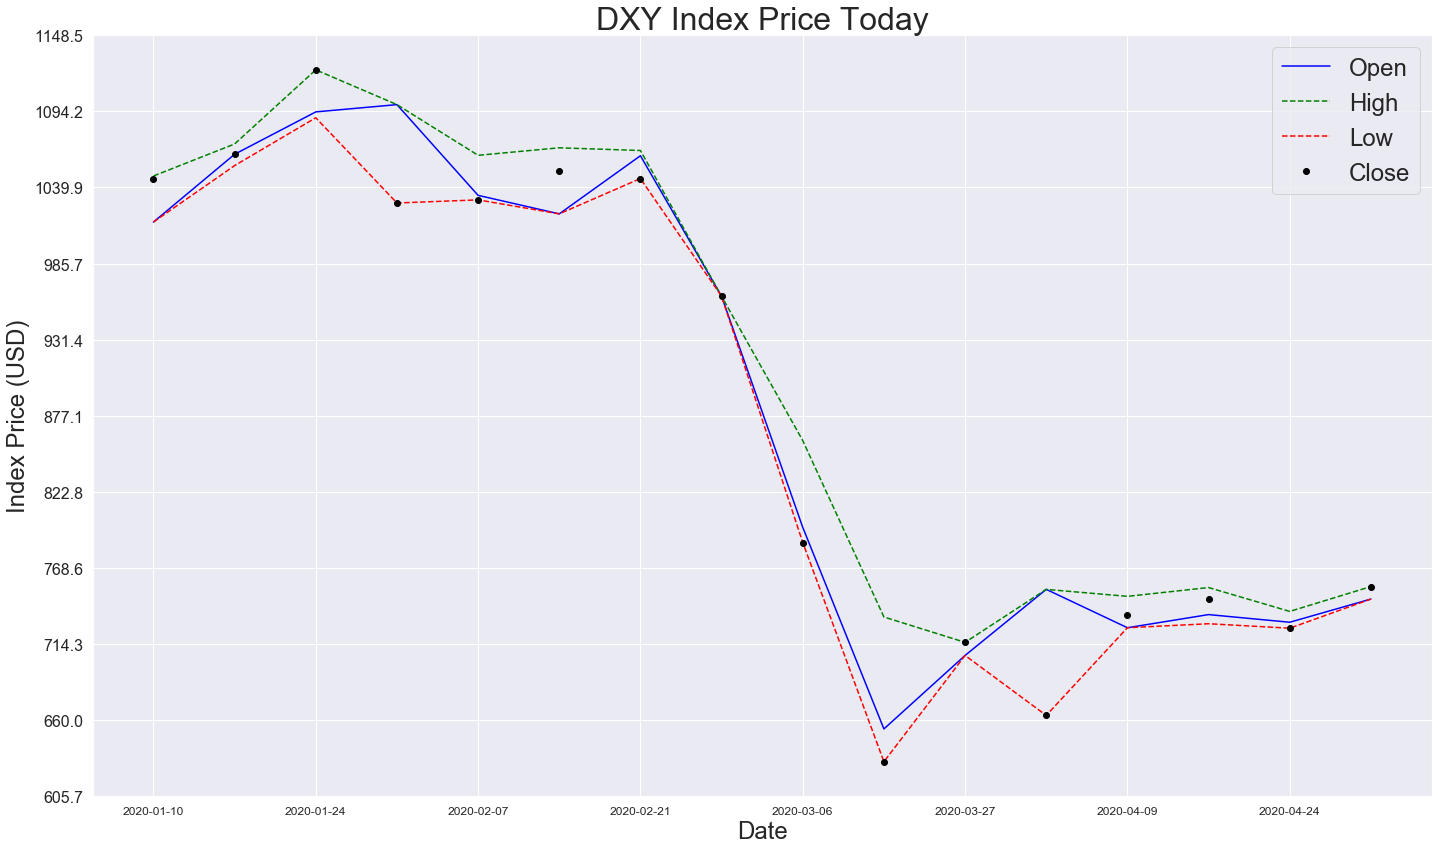

In [155]:
figure = plt.figure(1,figsize=(24,14))
data_corona_plot = figure.add_subplot(111)
data_corona_plot.set_xlabel('Date',fontsize=24)
data_corona_plot.set_ylabel('Index Price (USD)',fontsize=24)
data_corona_plot.set_title('DXY Index Price Today',fontsize=32)
data_corona_plot.tick_params(axis='y', which='major', labelsize=16)
data_corona_plot.tick_params(axis='x', which='major', labelsize=12)
data_corona_plot_open = data_corona_plot.plot(data_corona['Date'],data_corona['1. open'],color='blue', label='Open')
data_corona_plot_high = data_corona_plot.plot(data_corona['Date'],data_corona['2. high'],'--',color='green', label='High')
data_corona_plot_low = data_corona_plot.plot(data_corona['Date'],data_corona['3. low'],'--',color='red', label='Low')
data_corona_plot_close = data_corona_plot.plot(data_corona['Date'],data_corona['4. close'],'o', color='black', label='Close')
data_corona_plot.legend(loc=1, fontsize=24)
data_corona_plot.xaxis.set_major_locator(MaxNLocator(integer=True))
data_corona_plot.yaxis.set_major_locator(LinearLocator(11))
plt.show()
figure.savefig('DXY_Index_Price_Corona_Crisis.jpg')

In [147]:
data_corona['1. open'].dtypes

dtype('float64')